In [36]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

from astropy.convolution import convolve, Box1DKernel

lc1 = fits.open('ch2_xsm_20210923_v1_level2.lc')
lc2 = fits.open('ch2_xsm_20210924_v1_level2.lc')
lc3 = fits.open('ch2_xsm_20210927_v1_level2.lc')
lc4 = fits.open('ch2_xsm_20210928_v1_level2.lc')
lc5 = fits.open('ch2_xsm_20210929_v1_level2.lc')

lc_arr = [lc1, lc2, lc3, lc4, lc5]

In [16]:
lc1.info()

Filename: ch2_xsm_20210923_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   84280R x 4C   [D, E, E, E]   


In [15]:
lc1_primary = lc1[0].header
lc1_rate = lc1[1].header

In [5]:
lc1_primary

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20210923_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [18]:
lc1_rate

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                84280 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

In [17]:
lc1_data = lc1[1].data
lc1_data


FITS_rec([(1.49126401e+08, 494.83276, 22.244837, 1.),
          (1.49126402e+08, 518.2688 , 22.765518, 1.),
          (1.49126403e+08, 504.4697 , 22.460403, 1.), ...,
          (1.49212797e+08, 376.00684, 19.390896, 1.),
          (1.49212798e+08, 374.12167, 19.342226, 1.),
          (1.49212799e+08, 401.34076, 20.033491, 1.)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')]))

In [8]:
print("Data: ")
print(lc1_data)
print("Size and data type:")
print(lc1_data.shape, lc1_data.dtype)

Data: 
[(1.49126401e+08, 494.83276, 22.244837, 1.)
 (1.49126402e+08, 518.2688 , 22.765518, 1.)
 (1.49126403e+08, 504.4697 , 22.460403, 1.) ...
 (1.49212797e+08, 376.00684, 19.390896, 1.)
 (1.49212798e+08, 374.12167, 19.342226, 1.)
 (1.49212799e+08, 401.34076, 20.033491, 1.)]
Size and data type:
(84280,) (numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')])


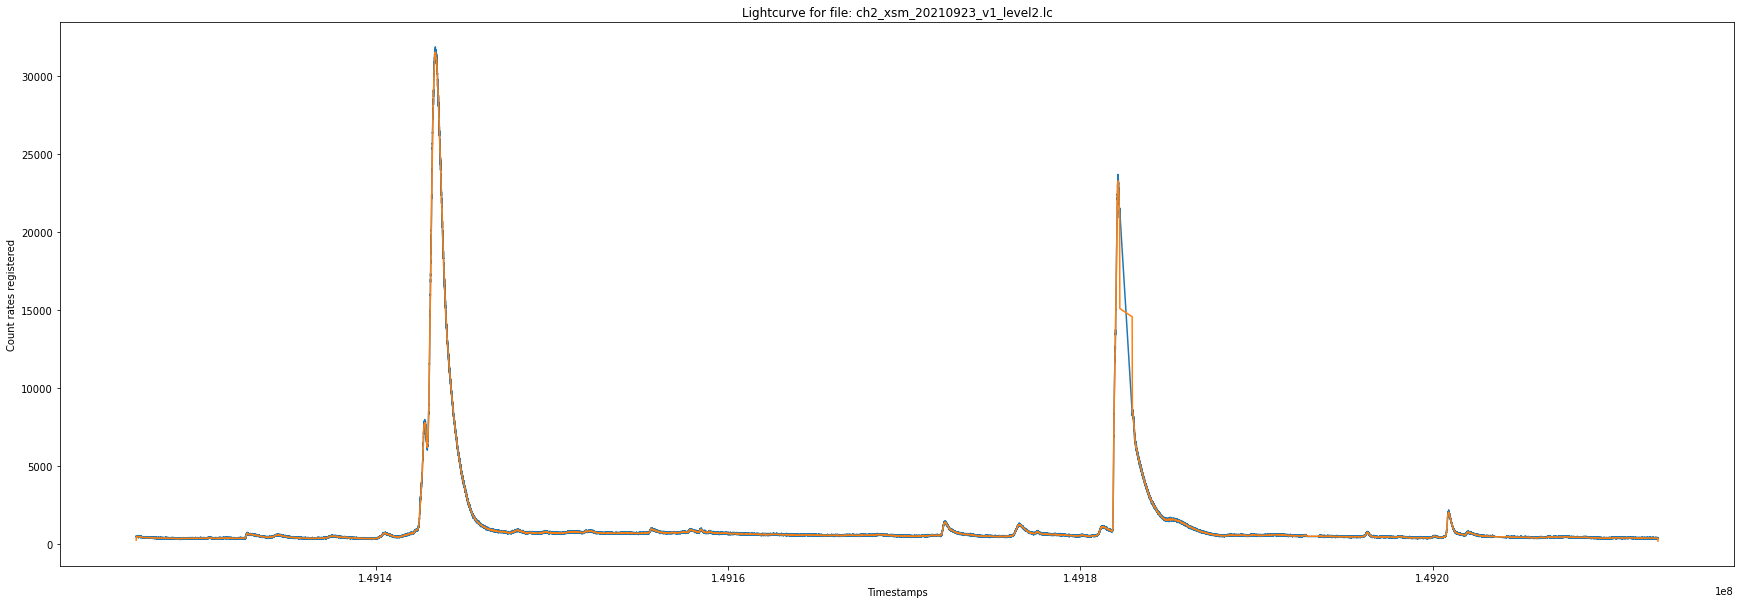

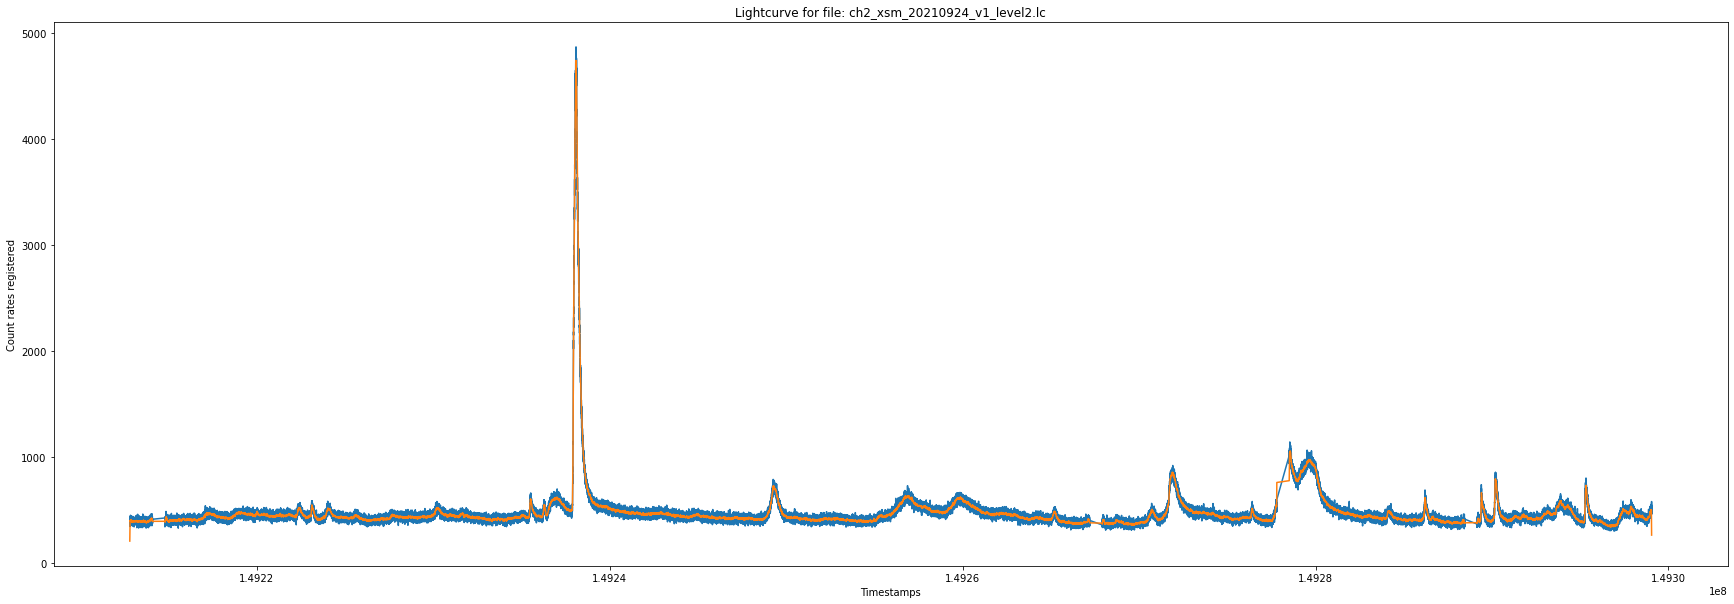

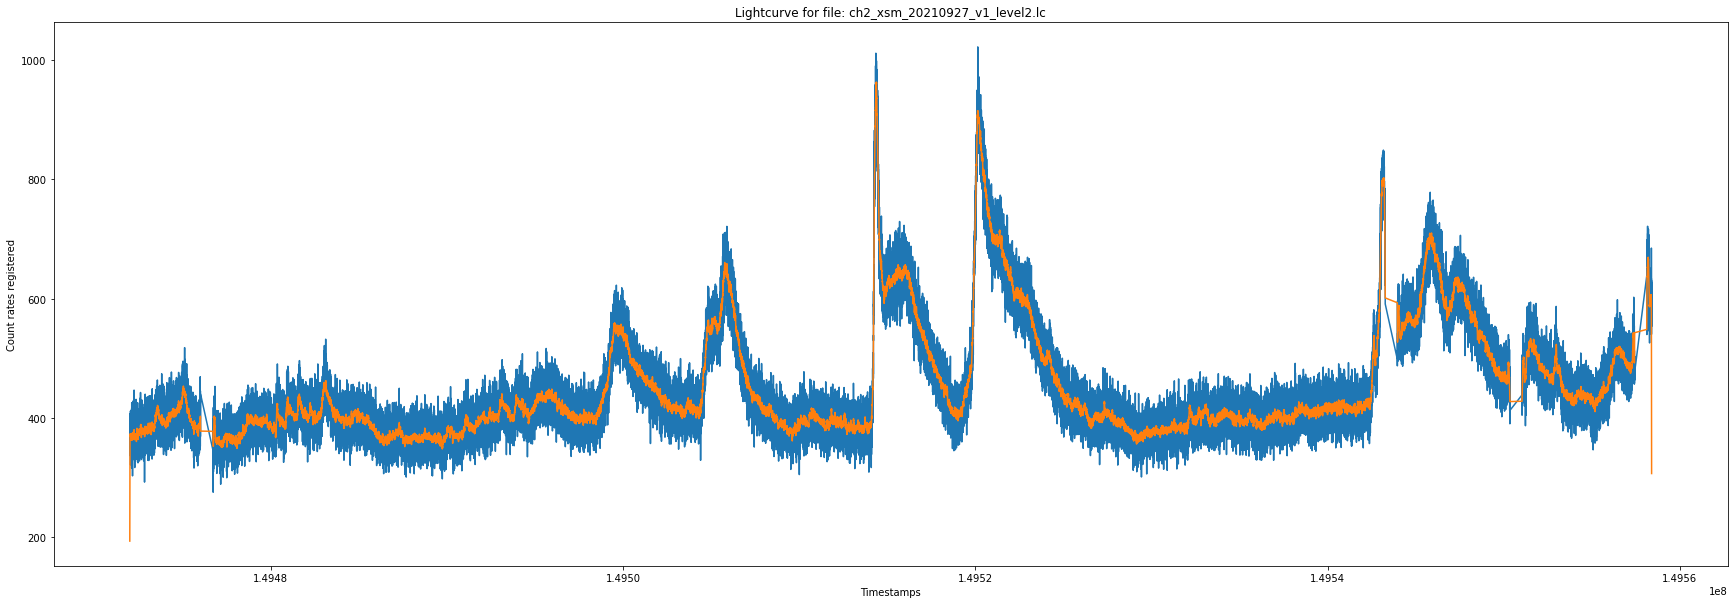

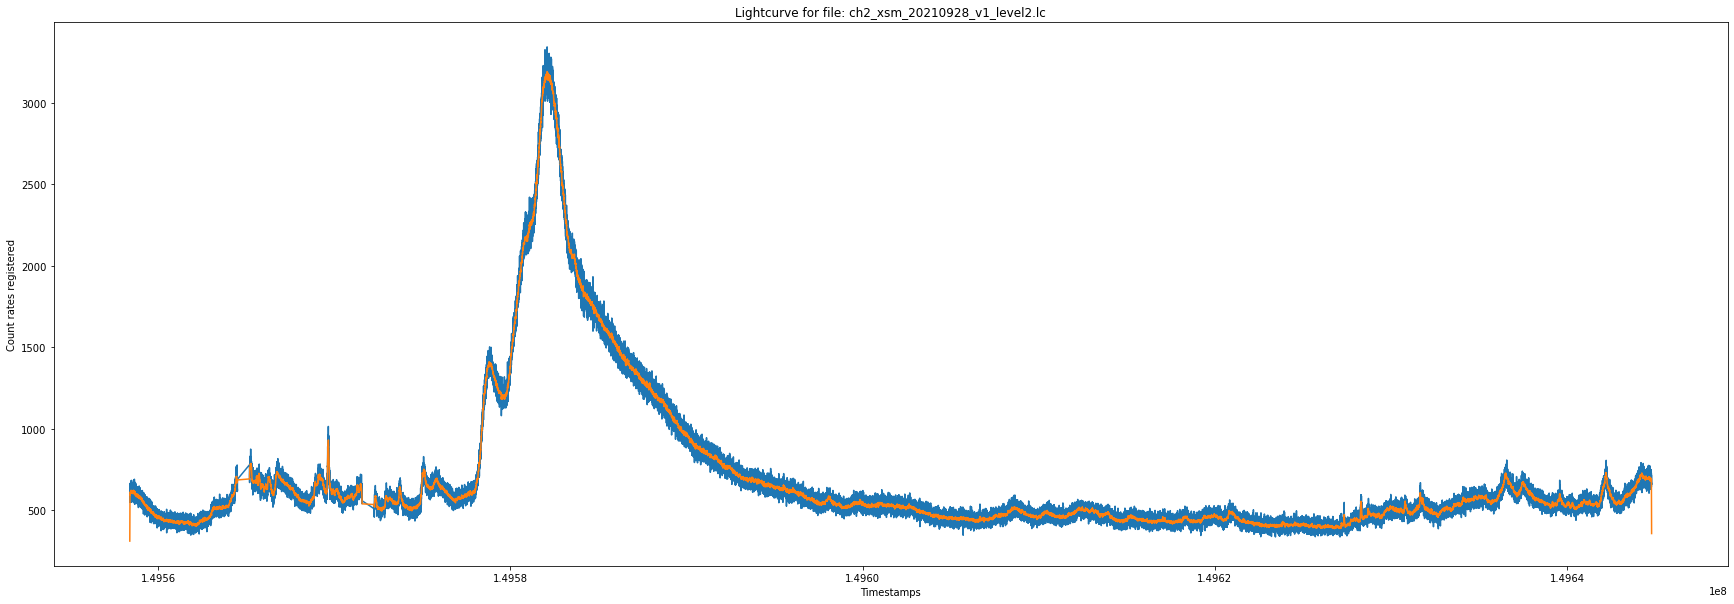

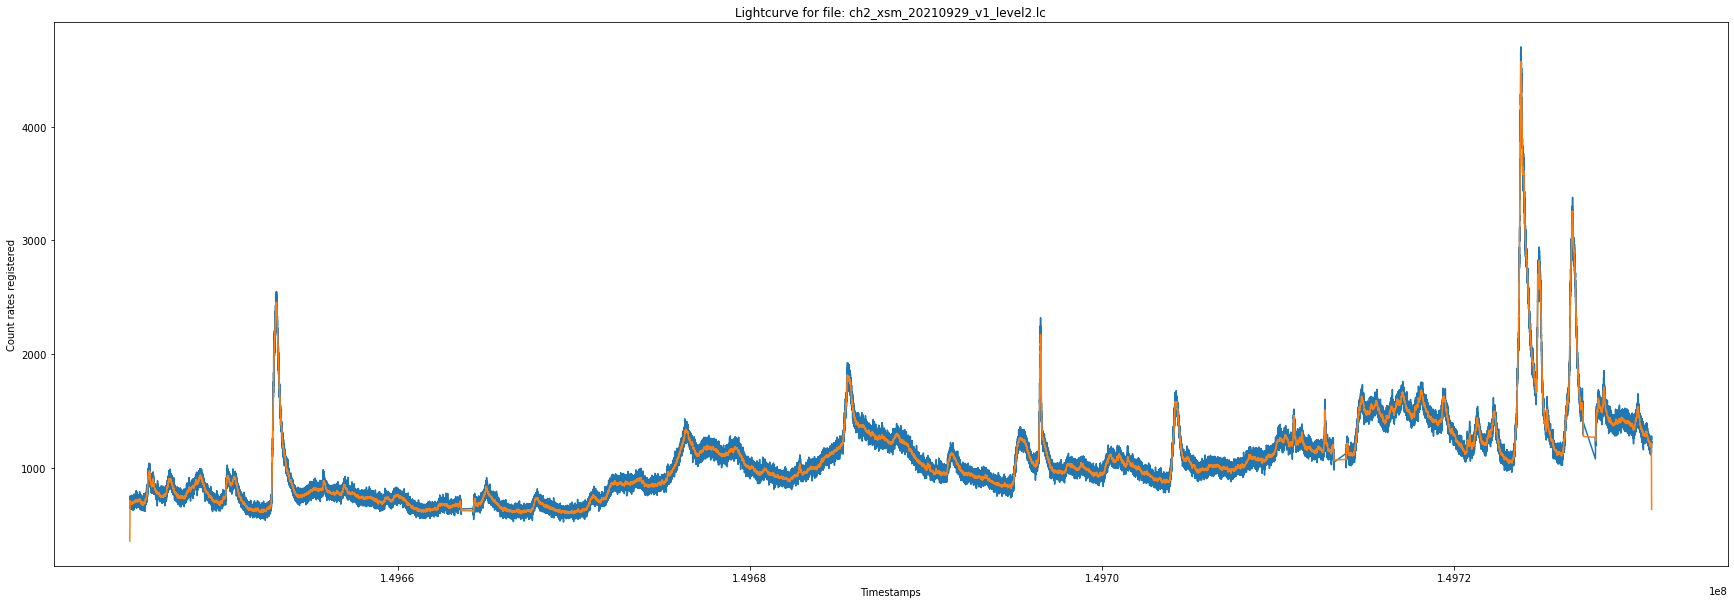

In [44]:
for lc in lc_arr:
    fig, ax = plt.subplots(1, 1, figsize = (30, 10))
    ax.plot(lc[1].data['TIME'], lc[1].data['RATE'],label='Normal')
    smoothed_signal = convolve( lc[1].data['RATE'], Box1DKernel(25))
    ax.plot(lc[1].data['TIME'], smoothed_signal,label='Smoothed')
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Count rates registered")
    ax.set_title(f"Lightcurve for file: {lc[0].header['FILENAME']}")
    

<IPython.core.display.Javascript object>


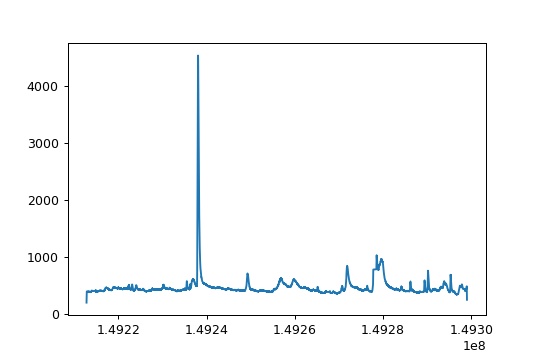